mean of the samples is 169.96
standard deviation of the samples is 4.97


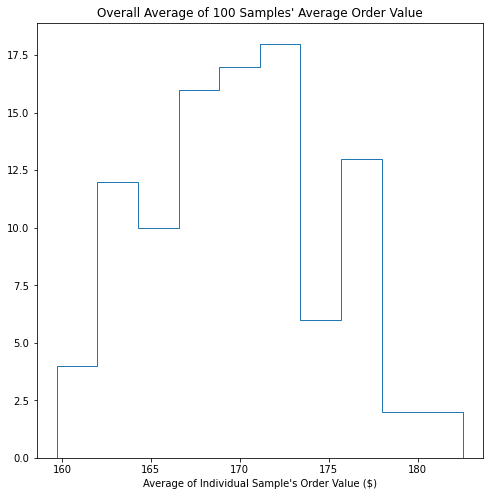

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def repeat_sample_draws_exponential(n, samp_size, mu, show_all=False):
    means = []

    samples = []
    for ii in range(0, n):
        samples.append(np.random.exponential(mu, samp_size))
        means.append(np.mean(samples[ii]))

    if show_all:
        pltdim = np.math.ceil(np.math.sqrt(n))
        fig, axs = plt.subplots(pltdim, pltdim, figsize=(8, 8), gridspec_kw={'hspace': 0.2}, sharex=True, sharey=True)
        fig.suptitle('Individual Samples\' Order Value Distribution')
        fig.text(0.5, 0.04, 'Order Values ($)', ha='center')
        fig.text(0.04, 0.5, 'Number of Customers', ha='center', rotation='vertical')
        axs = axs.flatten()
        for ii in range(0, n):

            plt.sca(axs[ii])

            plt.gca().hist(samples[ii], bins=int(50), histtype='step',
                           label='$mean = {0:.2f}$'.format(np.mean(samples[ii])), range=[0, 2 * mu])
            if n < 10:
                plt.gca().set_title('Sample #{0} : average={1:.2f}'.format(ii, np.mean(samples[ii])))
            for item in ([axs[ii].title, axs[ii].xaxis.label, axs[ii].yaxis.label] +
                             axs[ii].get_xticklabels() + axs[ii].get_yticklabels()):
                item.set_fontsize(8)

        plt.savefig('expdist_{0}_mu_{1}_sample_{2}_sampsize'.format(mu, n, samp_size))

    plt.clf()
    plt.hist(means, bins=int(10), histtype='step')
    plt.title('Overall Average of {} Samples\' Average Order Value'.format(n))
    plt.xlabel('Average of Individual Sample\'s Order Value ($)')
    plt.savefig('average_of_expdist_{0}_mu_{1}_sample_{2}_sampsize'.format(mu, n, samp_size))
    print('mean of the samples is {0:.2f}'.format(np.mean(means)))
    print('standard deviation of the samples is {0:.2f}'.format(np.std(means)))

repeat_sample_draws_exponential(100, 1000, 170, True)

## 1. Import necessary libraries - numpy, matplotlib and wand

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#from wand.image import Image
#from wand.display import display
%matplotlib notebook

## 2. Create 1000 simulations of die rolls

In [8]:
# 1000 simulations of die roll
n = 1000

# In each simulation, there is one trial more than the previous simulation
avg = []
for i in range(2,n):
    a = np.random.randint(1,7,i)
    avg.append(np.average(a))

In [9]:
# sample 10 expected value of die rolls
avg[1:10]

[3.6666666666666665,
 2.75,
 4.0,
 3.6666666666666665,
 4.285714285714286,
 3.125,
 4.222222222222222,
 3.2,
 3.727272727272727]

## 3. Function to plot histogram and animation

In [10]:
# Function that will plot the histogram, where current is the latest figure
def clt(current):
    # if animation is at the last frame, stop it
    plt.cla()
    if current == 1000: 
        a.event_source.stop()

    plt.hist(avg[0:current])

    plt.gca().set_title('Expected value of die rolls')
    plt.gca().set_xlabel('Average from die roll')
    plt.gca().set_ylabel('Frequency')

    plt.annotate('Die roll = {}'.format(current), [3,27])

## 4. Save the animation as a gif

In [16]:
fig = plt.figure()
a = animation.FuncAnimation(fig, clt, interval=1)
a.save('clt2.gif', writer='pillow', fps=10)

<IPython.core.display.Javascript object>